In [94]:
# For data structure
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

# For division, avoiding worry about float data for like python3
from __future__ import division
  
import matplotlib
params = {'axes.labelsize': 18,'axes.titlesize':20, 'font.size': 20, 'legend.fontsize': 16, 'xtick.labelsize': 18, 'ytick.labelsize': 18}
matplotlib.rcParams.update(params)

In [102]:
# Major index ETFs

etf_list = ['SPY','QQQ','IWM','DIA','^VIX', 'USO','GLD','GDX']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year-2,end.month,end.day)

# For loop for grabing yahoo finance data and setting as a dataframe
for stock in etf_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [108]:
USO.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-03,38.389999,38.400002,38.240002,38.250000,1447500,38.250000
2014-07-07,38.270000,38.290001,38.049999,38.169998,1428400,38.169998
2014-07-08,38.259998,38.419998,37.980000,38.180000,2418100,38.180000
2014-07-09,37.889999,37.910000,37.619999,37.689999,5838100,37.689999
2014-07-10,37.630001,37.990002,37.590000,37.900002,3672300,37.900002


In [110]:
def ma_macd(stock):
    # plot out several moving averages
    ma_day = [10,20,50,100,200]

    for ma in ma_day:
        column_name = "MA%s" %(str(ma))
        stock[column_name]=Series.rolling(stock['Adj Close'],window=ma).mean()
    
    plt1=stock[['Adj Close','MA10','MA20','MA50','MA100','MA200']].plot(subplots=False,figsize=(16,6))
    plt1.spines['top'].set_color("w")
    plt1.spines['right'].set_color("w")

    # Draw several MACD lines (MACD8,13; MACD13,21; MACD21,34; MACD34,55)
    ema8=stock['Adj Close'].ewm(span=8).mean().values
    ema13=stock['Adj Close'].ewm(span=13).mean().values
    ema21=stock['Adj Close'].ewm(span=21).mean().values
    ema34=stock['Adj Close'].ewm(span=34).mean().values
    #ema55=SPY['Adj Close'].ewm(span=55).mean().values

    stock['MACD8v13'] = ema8 - ema13
    stock['MACD13v21'] = ema13 - ema21
    stock['MACD21v34'] = ema21 - ema34
    #SPY['MACD34v55'] = ema34 - ema55
   
    plt2=stock[['MACD8v13','MACD13v21','MACD21v34']].plot(subplots=False,sharex= plt1, figsize=(16,6))
    plt2.spines['top'].set_color("w")
    plt2.spines['right'].set_color("w")

# 我们可以绘制数个 MACD,期望尽早检出测趋势反转信号.

# (8,13), (13,21), (21,34), (34,55)   4组 斐波那契数字可以覆盖相对短期至中期的趋势, 第三个参数可以被删除.

# MACD (8,13) 已向下越过MACD (21,34), MACD (13,21) 也已向下越过MACD (21,34), 解释上升趋势可能已经逆转


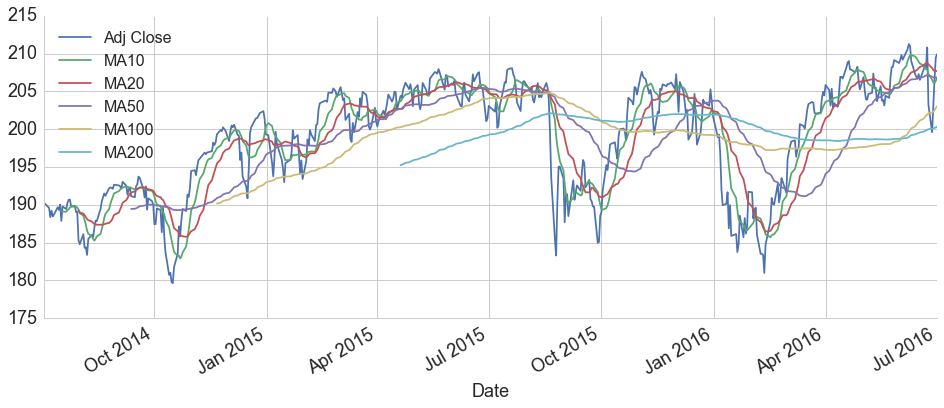

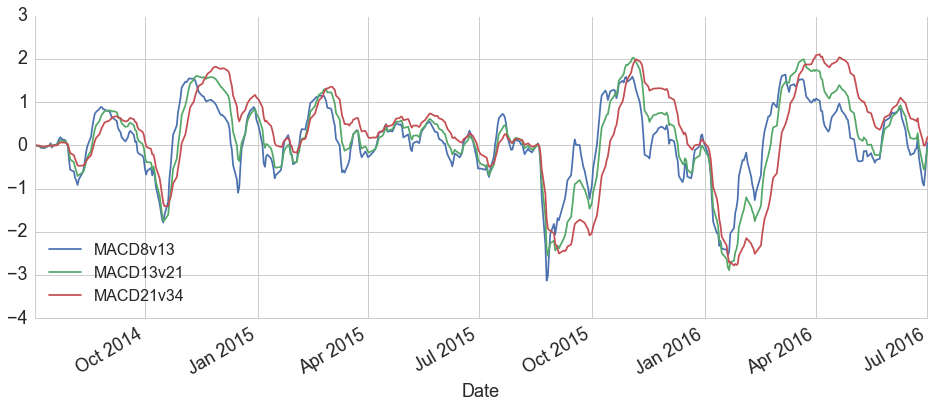

In [111]:
ma_macd(SPY)

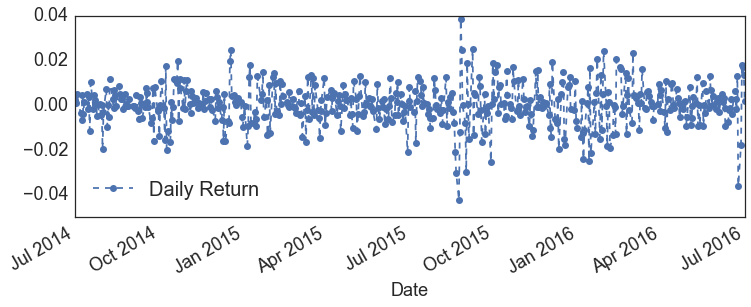

In [52]:
#Section 2 - Daily Return Analysis
# We'll use pct_change to find the percent change for each day
SPY['Daily Return'] = SPY['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
SPY['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

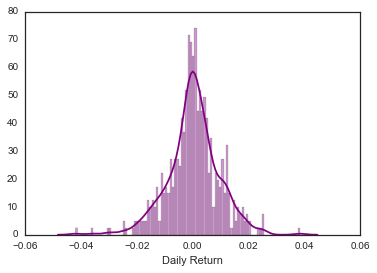

In [6]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(SPY['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
# SPY['Daily Return'].hist()

In [7]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['SPY','QQQ','IWM','DIA','^VIX', 'USO','GLD','GDX'],'yahoo',start,end)['Adj Close']

# Let's take a quick look
closing_df.head()

,DIA,GDX,GLD,IWM,QQQ,SPY,USO,^VIX
Date,,,,,,,,
2014-06-30,160.408778,26.053811,128.039993,115.555961,91.885723,187.871972,38.880001,11.57
2014-07-01,161.660402,25.846955,127.699997,116.732820,92.893519,189.129441,38.860001,11.15
2014-07-02,161.851487,26.083360,127.699997,116.282724,93.050066,189.321418,38.400002,10.82
2014-07-03,162.873815,26.103061,127.160004,116.985694,93.637132,190.252524,38.250000,10.32
2014-07-07,162.290996,25.649952,127.019997,114.984183,93.353389,189.590189,38.169998,11.33


In [8]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,DIA,GDX,GLD,IWM,QQQ,SPY,USO,^VIX
Date,,,,,,,,
2014-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-01,0.007803,-0.007940,-0.002655,0.010184,0.010968,0.006693,-0.000514,-0.036301
2014-07-02,0.001182,0.009146,0.000000,-0.003856,0.001685,0.001015,-0.011837,-0.029596
2014-07-03,0.006316,0.000755,-0.004229,0.006045,0.006309,0.004918,-0.003906,-0.046211
2014-07-07,-0.003578,-0.017358,-0.001101,-0.017109,-0.003030,-0.003481,-0.002092,0.097868


C:\Anaconda3\envs\conda27\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda3\envs\conda27\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


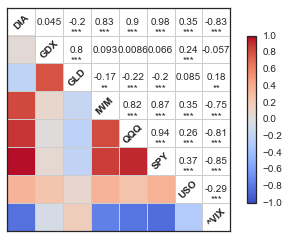

In [9]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.corrplot(tech_rets.dropna(),annot=True)

In [10]:
# Risk Analysis
# There are many ways we can quantify risk, one of the most basic ways using the 
# information we've gathered on daily percentage returns is by comparing the
# expected return with the standard deviation of the daily returns.

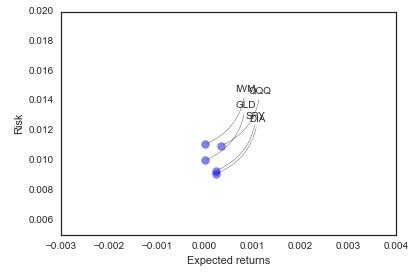

In [12]:
# Let's start by defining a new DataFrame as a cleaned version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.005,0.02])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [13]:
# Value at risk using the "bootstrap" method
# For this method we will calculate the empirical quantiles from a histogram of 
# daily returns. For more information on quantiles, check out this link: 
#     http://en.wikipedia.org/wiki/Quantile

#Let's go ahead and repeat the daily returns histogram for SPY.

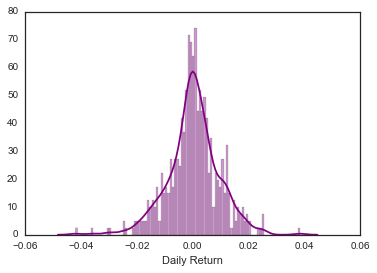

In [14]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(SPY['Daily Return'].dropna(),bins=100,color='purple')

In [15]:
# The 0.05 empirical quantile of daily returns
rets['SPY'].quantile(0.05)

-0.015406616157801745

In [16]:
# Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then 
we'll calculate portfolio losses for each trial. After this, we'll use the 
aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as 
a Markov process. This means that the stock price follows a random walk and is 
consistent with (at the very least) the weak form of the efficient market 
hypothesis (EMH): past price information is already incorporated and the next 
    price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of 
where the stock price will be in the future, basically meaning, you can't 
perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt−−−√
ΔSS=μΔt+σϵΔt
Where S is the stock price, mu is the expected return (which we calculated 
earlier),sigma is the standard deviation of the returns, t is time, and epsilon
is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and 
solve for the stock price.

ΔS=S(μΔt+σϵΔt−−−√)
ΔS=S(μΔt+σϵΔt)
Now we see that the change in the stock price is the current stock price 
multiplied by two terms. The first term is known as "drift", which is the 
average daily return multiplied by the change of time. The second term is known 
as "shock", for each tiem period the stock will "drift" and then experience 
a "shock" which will randomly push the stock price up or down. By simulating 
this series of steps of drift and shock thousands of times, we can begin to do 
a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following 
link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few 
simulations. First we'll define the variables we'll be using the Google 
DataFrame GOOG

SyntaxError: invalid syntax (<ipython-input-16-56bc73b31df3>, line 2)

In [17]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['SPY']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['SPY']

In [18]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

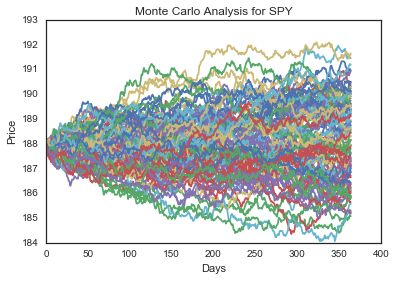

In [21]:
# Get start price from SPY.head()
start_price = 187.87

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for SPY')

In [22]:
# Set a large numebr of runs
runs = 1000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

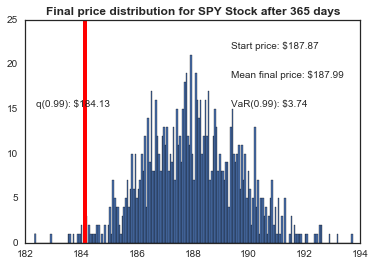

In [23]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for SPY Stock after %s days" % days, weight='bold');

In [ ]:
Awesome! Now we have looked at the 1% empirical quantile of the final price 
distribution to estimate the Value at Risk for the Google stock, which looks 
to be $3.74 for every investment of 187.87 (the price of one inital google 
stock).

This basically menas for every initial stock you purchase your putting about 
$3.74 at risk 99% of the time from our Monte Carlo Simulation.



Build a practice portfolio and see how well you can predict you risk values
with real stock information!

Look further into correlatino of two stocks and see if that gives you any 
insight into future possible stock prices.